## STANDARD BOOTLEG MACRO RESEARCH TEMPLATE
The cell below imports the standard stuff and make a button to bring up the search_symbol_gui. 
With this you can search for asset data and create watchlists. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["backend"] = "QtAgg"
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 6)

import os
wd = %pwd
parent = os.path.dirname(wd); grampa = os.path.dirname(parent)
fdel = os.path.sep
import sys
sys.path.append(grampa)

from MacroBackend import Utilities, PriceImporter, Pull_Data, Charting, Fitting
import datetime
import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = Utilities.api_keys()

%gui qt
from MacroBackend import search_symbol_gui
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
display(button)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Looking for api keys in SystemInfo folder... /home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.


Button(description='Search for symbols', style=ButtonStyle())

In [1]:
%config InlineBackend

UsageError: Invalid config statement: 'InlineBackend', should be `Class.trait = value`.


In [4]:
watchlist["watchlist"]

,title,source
id,,
VIXCLS,CBOE Volatility Index: VIX,fred
^SPX,S&P 500 INDEX,yfinance
^NDX,NASDAQ 100,yfinance
^DJI,Dow Jones Industrial Average,yfinance


## Pull data for the watchlist using my DataSet class...

In [5]:
ds1 = Pull_Data.dataset()
ds1.get_data(source = watchlist["watchlist"].iloc[1]["source"], data_code=watchlist["watchlist"].index[1], start_date="1970-01-01")
ds1.data.head()
ds2 = Pull_Data.dataset()
ds2.get_data(source = watchlist["watchlist"].iloc[0]["source"], data_code=watchlist["watchlist"].index[0], start_date="1970-01-01")
ds2.data.head()

Looking for api keys in SystemInfo folder... /home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  yfinance data code:  ^SPX
Trying yfinance package to get historical data for  ^SPX
Looking for api keys in SystemInfo folder... /home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  fred data code:  VIXCLS
FRED API response:  200


date
1990-01-02    17.24
1990-01-03    18.19
1990-01-04    19.22
1990-01-05    20.11
1990-01-08    20.26
Name: VIXCLS, dtype: float64

In [13]:
ds1.data = ds1.data[datetime.datetime.strptime("1990-01-02", "%Y-%m-%d").date()::]
# data = pd.DataFrame([ds1.data.to_list(), ds2.data], index = ds1.data.index)
# data

In [14]:
spx = ds1.data; vix = ds2.data
rets_spx = np.log(spx/spx.shift(1))
rets_vix = np.log(vix/vix.shift(1))

array([<Axes: >, <Axes: >], dtype=object)

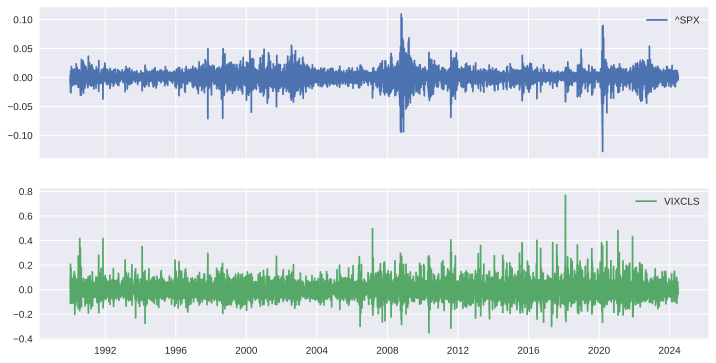

In [19]:
rets_df = pd.concat([rets_spx, rets_vix], axis=1)
rets_df.plot(subplots=True)

In [ ]:
corr = spx.rolling(250).corr(vix)
corr.plot()
pd.plotting.scatter_matrix(rets_df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:

corr_nat = spx.rolling(250).corr(vix)
corr_nat.plot()
spx